In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [152]:
dataset = pd.read_csv('F:/Python/Heart-Disease-Prediction-using-Machine-Learning/Prediction.csv')

In [3]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
dataset.shape

(303, 14)

In [5]:
dataset.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
67,45,0,1,130,234,0,0,175,0,0.6,1,0,2,1
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
149,42,1,2,130,180,0,1,150,0,0.0,2,0,2,1


In [6]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(dataset.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [10]:
dataset['target'].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

1    165
0    138
Name: target, dtype: int64


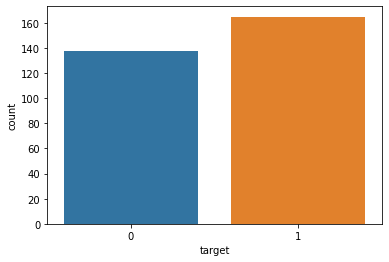

In [11]:
y = dataset['target']
sns.countplot(y)
target_temp = dataset.target.value_counts()
print(target_temp)

In [12]:
countNoDisease = len(dataset[dataset.target == 0])
countHaveDisease = len(dataset[dataset.target == 1])

In [13]:
countNoDisease

138

In [14]:
countHaveDisease

165

In [15]:
print("Percentage of patience without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patience with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patience without heart problems: 45.54
Percentage of patience with heart problems: 54.46


# We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

# Analysing the 'Sex' feature

In [16]:
dataset['sex'].unique()

array([1, 0], dtype=int64)

# We notice, that as expected, the 'sex' feature has 2 unique features

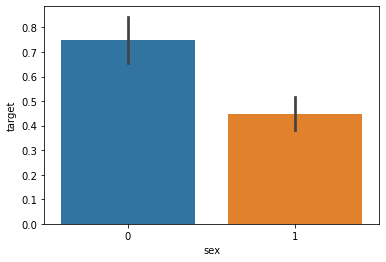

In [17]:
sns.barplot(dataset['sex'],y)

We notice, that females are more likely to have heart problems than males

# Analysing the 'Chest Pain Type' feature

In [18]:
dataset['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

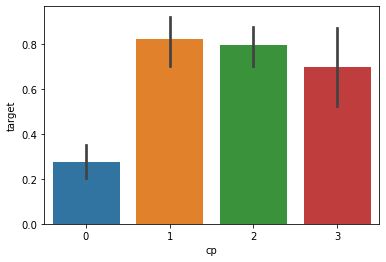

In [19]:
sns.barplot(dataset['cp'],y)

We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

# Analysing the FBS feature

In [20]:
dataset['fbs'].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [21]:
dataset['fbs'].unique()

array([1, 0], dtype=int64)

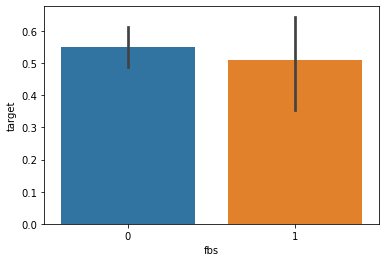

In [22]:
sns.barplot(dataset['fbs'],y)

Nothing extraordinary here

# Analysing the restecg feature

In [23]:
dataset['restecg'].unique()

array([0, 1, 2], dtype=int64)

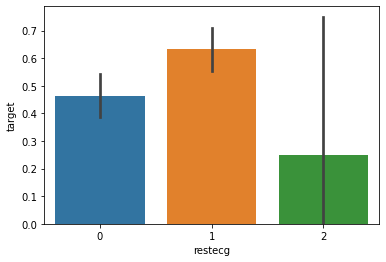

In [24]:
sns.barplot(dataset['restecg'],y)

We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

# Analysing the 'exang' feature

In [25]:
dataset['exang'].unique()

array([0, 1], dtype=int64)

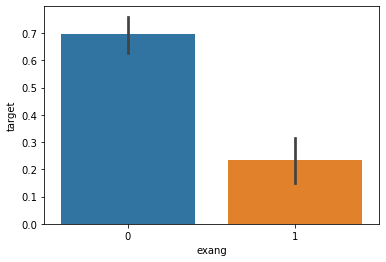

In [26]:
sns.barplot(dataset['exang'],y)

People with exang = 1 i.e Excercise include angina are much less likely to have heart problems

# Anslysing the slope feature

In [28]:
dataset['slope'].unique()

array([0, 2, 1], dtype=int64)

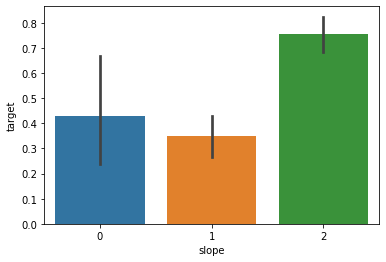

In [29]:
sns.barplot(dataset['slope'],y)

We observe, tht Slope '2' causes heart pain much more thn Slope '0' and '1'

# Analysing the 'ca'feature

In [30]:
dataset['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

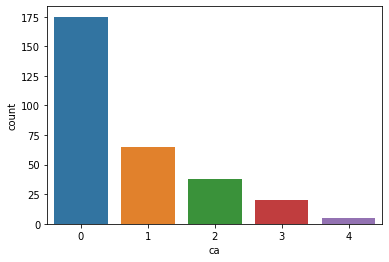

In [32]:
sns.countplot(dataset['ca'])

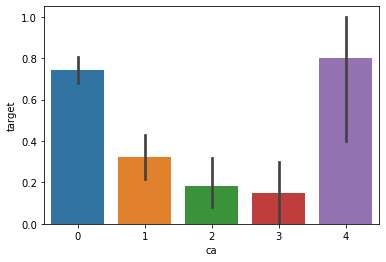

In [33]:
sns.barplot(dataset['ca'],y)

ca=4 has astonishingly large number of heart patients

# Analysis the total feature

In [34]:
dataset['thal'].unique()

array([1, 2, 3, 0], dtype=int64)

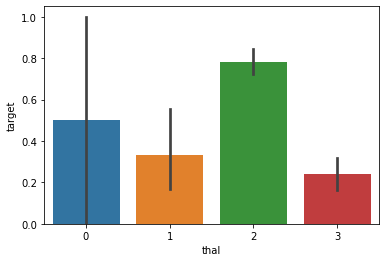

In [35]:
sns.barplot(dataset['thal'],y)

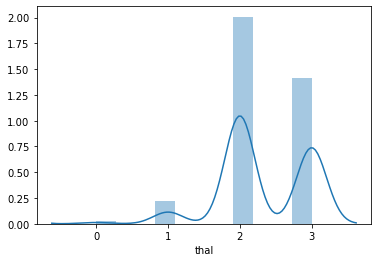

In [36]:
sns.distplot(dataset['thal'])

# Train-Test-Split

In [37]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop('target',axis=1)
target = dataset['target']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(predictors,target, test_size=0.20, random_state=0)

In [39]:
x_train.shape

(242, 13)

In [40]:
x_test.shape

(61, 13)

In [41]:
y_train.shape

(242,)

In [42]:
y_test.shape

(61,)

# Model Fitting

In [43]:
from sklearn.metrics import accuracy_score

# Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [45]:
lr.fit(x_train,y_train)

LogisticRegression()

In [46]:
y_pred_lr = lr.predict(x_test)

In [47]:
y_pred_lr

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [48]:
y_pred_lr.shape

(61,)

In [51]:
score_lr = round(accuracy_score(y_pred_lr, y_test)*100,2)

In [52]:
print("The accuracy score achived using Logistic Regression is: "+str(score_lr)+"%")

The accuracy score achived using Logistic Regression is: 85.25%


# Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB

In [55]:
nb = GaussianNB()

In [56]:
nb.fit(x_train,y_train)

y_pred_nb = nb.predict(x_test)

In [57]:
y_pred_nb.shape

(61,)

In [58]:
score_nb = round(accuracy_score(y_pred_nb, y_test)*100,2)
print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+"%")

The accuracy score achieved using Naive Bayes is: 85.25%


# SVM

In [59]:
from sklearn import svm

sv = svm.SVC(kernel = 'linear')

sv.fit(x_train, y_train)
y_pred_svm = sv.predict(x_test)

In [60]:
y_pred_svm.shape

(61,)

In [61]:
score_svm = round(accuracy_score(y_pred_svm,y_test)*100,2)
print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+"%")

The accuracy score achieved using Linear SVM is: 81.97%


# K Nearest Neighbors

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

In [68]:
y_pred_knn.shape

(61,)

In [69]:
score_knn = round(accuracy_score(y_pred_knn,y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+"%")

The accuracy score achieved using KNN is: 67.21%


# Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier
max_accuracy = 0

for x in range(200):
    dt=DecisionTreeClassifier(random_state=x)
    dt.fit(x_train,y_train)
    y_pred_dt =dt.predict(x_test)
    current_accuracy = round(accuracy_score(y_pred_dt, y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)

81.97
11


In [77]:
dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(x_train,y_train)
y_pred_dt = dt.predict(x_test)

In [86]:
y_pred_dt.shape

(61,)

In [154]:
score_dt = round(accuracy_score(y_pred_dt,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+"%")

The accuracy score achieved using Decision Tree is: 81.97%


# Random Forest

In [155]:
from sklearn.ensemble import RandomForestClassifier

In [156]:
max_accuracy = 0

In [158]:
for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(x_train,y_train)
    y_pred_rf = rf.predict(x_test)
    current_accuracy = round(accuracy_score(y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
print(max_accuracy)
print(best_x)        

In [160]:
rf = RandomForestClassifier(random_state=best_x)
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)

In [161]:
score_rf = round(accuracy_score(y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+"%")

The accuracy score achieved using Decision Tree is: 90.16%


# XGBoost

In [165]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state = 42)
xgb_model.fit(x_train, y_train)
y_pred_xgb = xgb_model.predict(x_test)

[02:29:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [166]:
score_xgb = round(accuracy_score(y_pred_xgb,y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 78.69 %


# Output Final score

In [170]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost"]

In [176]:
for i in range(len(algorithms)):
    print("The accuracy score achived using "+algorithms[i]+"is:"+str(scores[i])+"%")

The accuracy score achived using Logistic Regressionis:85.25%
The accuracy score achived using Naive Bayesis:85.25%
The accuracy score achived using Support Vector Machineis:81.97%
The accuracy score achived using K-Nearest Neighborsis:67.21%
The accuracy score achived using Decision Treeis:81.97%
The accuracy score achived using Random Forestis:90.16%
The accuracy score achived using XGBoostis:78.69%


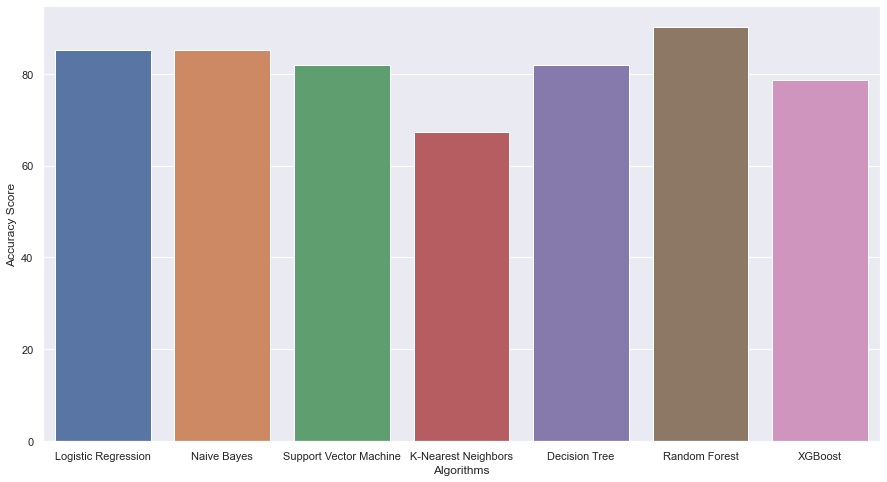

In [174]:
sns.set(rc={'figure.figsize' : (15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy Score")

sns.barplot(algorithms, scores)

Here random forest has good result as compare to other algorithms